In [1]:
using Plots, Optim, LinearAlgebra, LaTeXStrings, FiniteDiff

In [2]:
abstract type BoseHubbardModel end

struct MeanField <: BoseHubbardModel
    n_max :: Int64
    a :: Matrix{Float64}
    n :: Matrix{Float64}

    MeanField(n_max) = new(n_max, diagm(1 => sqrt.(1:n_max)), diagm(0 => 0:n_max))
end

function get_hamiltonian(model :: MeanField, t, mu, U, V, z, params)
    ψₐ, ψᵦ, ρₐ, ρᵦ = params
    H = -mu * model.n + 0.5 * U * model.n * (model.n - I) + 0.5 * V * z * (ρᵦ * model.n - ρₐ * ρᵦ * I) - t * z * ψᵦ * (model.a + model.a') + t * z * ψₐ * ψᵦ * I
    return H 
end

function get_order_parameter(model, t, mu, U, V, z)
    E_gs((ψₐ, ψᵦ, ρₐ, ρᵦ)) = eigvals(get_hamiltonian(model, t, mu, U, V, z, [ψₐ, ψᵦ, ρₐ, ρᵦ]))[1] + eigvals(get_hamiltonian(model, t, mu, U, V, z, [ψᵦ, ψₐ, ρᵦ, ρₐ]))[1]
    return Optim.minimizer(optimize(E_gs, zeros(4)))
end

# find N for the ground state
# function get_num_particles(model, t, mu, V, z)
#     psi, phi = get_order_parameter(model, t, mu, V, z)
#     gs = eigvecs(get_hamiltonian(model, t, mu, V, z, psi))[:, 1]
    
#     return gs' * model.n * gs
# end

get_order_parameter (generic function with 1 method)

In [4]:
z, t, mu, U, V = 4, 0.6, 4, 1, 0
model = MeanField(6)
get_order_parameter(model, t, mu, U, V, z)

4-element Vector{Float64}:
  1.2085984991424302e47
 -0.09562696291945022
 -6.872783046183843e46
 -2.836197869878634e46

In [5]:
model = MeanField(6)

z, size = 4, 50
# t = range(start = 0, stop = 0.1, length = size)
t = range(start = 0., stop = 0.6, length = size)
mu = range(start = 1, stop = 5, length = size)
V, U = 1., 0.

order_param = zeros((size, size, 4))
num_particles = zeros((size, size))

for k1 in 1:size
    for k2 in 1:size
        order_param[k2, k1, :] .= abs.(get_order_parameter(model, t[k1], mu[k2], U, V, z))
    # num_particles[k2, k1] = abs.(get_num_particles(model, t[k1], mu[k2], V, z))
    end
end

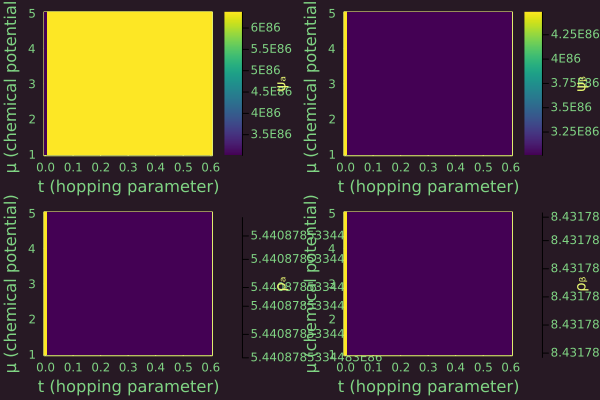

GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY


In [6]:
theme(:lime)
gr()
p = []
p_names = ["ψₐ", "ψᵦ", "ρₐ", "ρᵦ"]

for i in 1:4
    p_temp = heatmap(t, mu, order_param[:, :, i])
    plot!(
        ylabel = "μ (chemical potential)",
        xlabel = "t (hopping parameter)",
        framestyle = :box, 
        colorbar_title = p_names[i])

    push!(p, p_temp)
end

plot(p...)
